# Signature smoothing by kNN

Single-cell data are sparse, and gene expression is often not uniformly detected, even in cell types where specific markers should be present. Multi-gene signatures are already a lot more robust than relying on individual genes for phenotype characterization. However, they can still be impacted by data sparsity - especially short signatures composed of relatively few genes.

To mitigate sparsity, we can smooth signature scores across nearest neighbors in some relevant transcriptional space (e.g. PCA space or directly in gene expression space). pyUCell implements k-nearest neighbor (kNN) smoothing on the UCell scores stored in `adata.obs`, and returns smoothed scores that are less impacted by data sparsity. Below is a small example. 

## Prepare data and signatures

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pyucell as uc

To run pyUCell, you will need two things: 1. a single-cell data object in AnnData format, and 2. a list of gene signatures.

First, load a test dataset:

In [18]:
adata = sc.datasets.pbmc3k()

We will also calculate a PCA reduction of the expression data, which will be used for nearest-neighbor smoothing.

In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver="arpack", n_comps=50)

Define two simple signatures to test

In [20]:
signatures = {"Bcell": ["CD19", "MS4A1", "CD79A"], "Myeloid": ["LYZ", "SPI1"]}

## Run pyUCell

First we calculate UCell scores for these gene signatures:

In [21]:
uc.compute_ucell_scores(adata, signatures=signatures, chunk_size=500)

## kNN smoothing

We can then smooth scores using for example the 10 nearest neighbors in PCA space:

In [23]:
uc.smooth_knn_scores(adata, k=10, use_rep="X_pca", obs_columns=["Bcell_UCell", "Myeloid_UCell"], suffix="_kNN")
adata.obs

,Bcell_UCell,Myeloid_UCell,Myeloid_UCell_kNN,Bcell_UCell_kNN
index,,,,
AAACATACAACCAC-1,0.000000,0.000000,0.101080,0.020556
AAACATTGAGCTAC-1,0.421006,0.233567,0.074687,0.513137
AAACATTGATCAGC-1,0.000000,0.150150,0.069996,0.011671
AAACCGTGCTTCCG-1,0.000000,0.591258,0.577401,0.023835
AAACCGTGTATGCG-1,0.000000,0.000000,0.049323,0.000000
...,...,...,...,...
TTTCGAACTCTCAT-1,0.000000,0.604938,0.581622,0.014074
TTTCTACTGAGGCA-1,0.401202,0.000000,0.023058,0.392815
TTTCTACTTCCTCG-1,0.536271,0.000000,0.114894,0.578955


## Visualize results on UMAP

Let us visually compare the effect of kNN smoothing on the distribution of UCell scores for the two signatures.

In [24]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

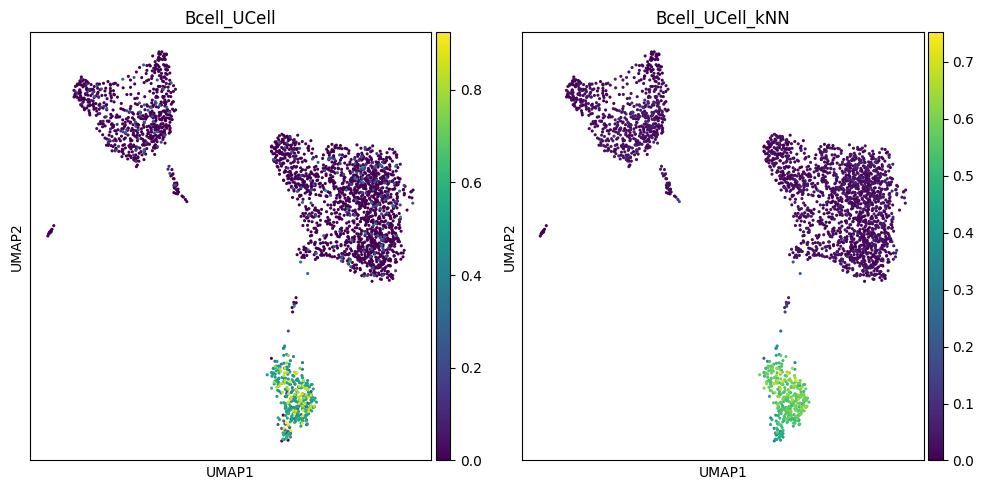

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sc.pl.umap(adata, color="Bcell_UCell", cmap="viridis", ax=axes[0], size=20, show=False)
sc.pl.umap(adata, color="Bcell_UCell_kNN", cmap="viridis", ax=axes[1], size=20, show=False)
plt.tight_layout()
plt.show()

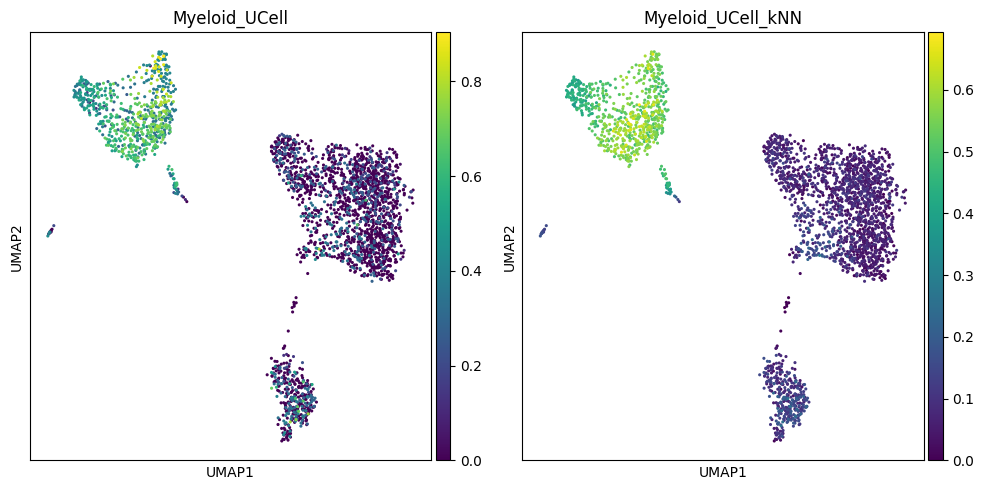

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sc.pl.umap(adata, color="Myeloid_UCell", cmap="viridis", ax=axes[0], size=20, show=False)
sc.pl.umap(adata, color="Myeloid_UCell_kNN", cmap="viridis", ax=axes[1], size=20, show=False)
plt.tight_layout()
plt.show()

## Additional resources

For more advanced use cases and a discussion of the parameters available, refer to [this tutorial](https://pyucell.readthedocs.io/en/latest/notebooks/parameters.html)

An implementation of the UCell algorithm for R is available at [Bioconductor](https://bioconductor.org/packages/UCell/) and on [GitHub](https://github.com/carmonalab/UCell).

## References

If you used UCell in your research, please cite:

**UCell and pyUCell: single-cell gene signature scoring for R and Python.** Massimo Andreatta & Santiago J Carmona (2026) *Bioinformatics* - [doi.org/10.1093/bioinformatics/btag055](https://doi.org/10.1093/bioinformatics/btag055)

**UCell: robust and scalable single-cell gene signature scoring.** Massimo Andreatta & Santiago J Carmona (2021) *CSBJ* - [doi.org/10.1016/j.csbj.2021.06.043](https://doi.org/10.1016/j.csbj.2021.06.043)